# Logging Plots as PNGs

`rubicon_ml` makes it easy to log `Plotly` plots and images with `artifacts`. In this example we'll walk through creating a plot using `plotly.express` and saving it as an `artifact`.

Before getting started, we'll have to install some dependencies for this example.

In [1]:
! pip install Pillow

## Set up
First lets set up our `rubicon_ml` project.

In [2]:
import os

from rubicon_ml import Rubicon


rubicon = Rubicon(persistence="memory")
project = rubicon.get_or_create_project("Artifact Plots")

Next, create plotting data. This example leverages `plotly` and `plotly.express` for data and plot generation.

In [3]:
import plotly.express as px
from plotly import data


df = data.wind()
df.head()

direction strength  frequency
0         N      0-1        0.5
1       NNE      0-1        0.6
2        NE      0-1        0.5
3       ENE      0-1        0.4
4         E      0-1        0.4

Using the plotting data generated, create a plot and save it to a file. Utilizing `write_image` we can save our plot to a file. We can use this file to later log with  `rubicon_ml`. 

In [4]:
scatter_plot = px.scatter(df, x="direction", y="frequency", color="strength")
scatter_plot.write_image("saved-scatter-plot-for-logging.png")

We can also create a plot and covert it to bytes to save it in memory. Using `to_image` we can convert our plot to bytes. 

In [5]:
bar_plot = px.bar(df, x="direction", y="frequency", color="strength")
bar_plot_bytes = bar_plot.to_image(format="png")

## Logging your plot
In `rubicon_ml` , `artifacts` are a catch-all for any other type of data that can be logged to a file. We can use artifacts to capture information that doesn't fall into the `experiment`, `dataframe`, `feature`, and  `parameter` categories. 

Leveraging `artifacts`, plots can be logged just by passing its file location in the `data_path` argument to `project.log_artifact()`.

In [6]:
project.log_artifact(
    name="scatter plot",
    data_path="saved-scatter-plot-for-logging.png",
    description="saved scatter plot with path",
)
artifact_plot_from_file = project.artifact(name="scatter plot")

We can also log plots by passing its byte representation to the `data_bytes` argument to `project.log_artifact()` as well.

In [7]:
project.log_artifact(name="bar plot", data_bytes=bar_plot_bytes)
artifact_plot_bytes = project.artifact(name="bar plot")

## Retrieving your logged plot programmatically 

Since the `PNG` representations of both plots were logged, we can retrieve our artifact plots programmatically. Using `io` and `PIL` we can visualize our plots as `PNG` images.

In [8]:
import io

from PIL import Image


imageScatterPlotStream = io.BytesIO(artifact_plot_from_file.data)
scatter_plot_image = Image.open(imageScatterPlotStream)

imageBarPlotStream = io.BytesIO(artifact_plot_bytes.data)
bar_plot_image = Image.open(imageBarPlotStream)

Finally, view the two images using `display`.

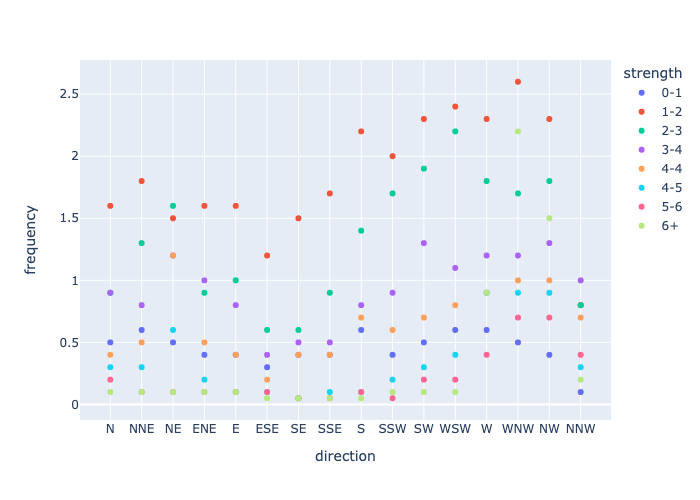

In [9]:
display(scatter_plot_image)

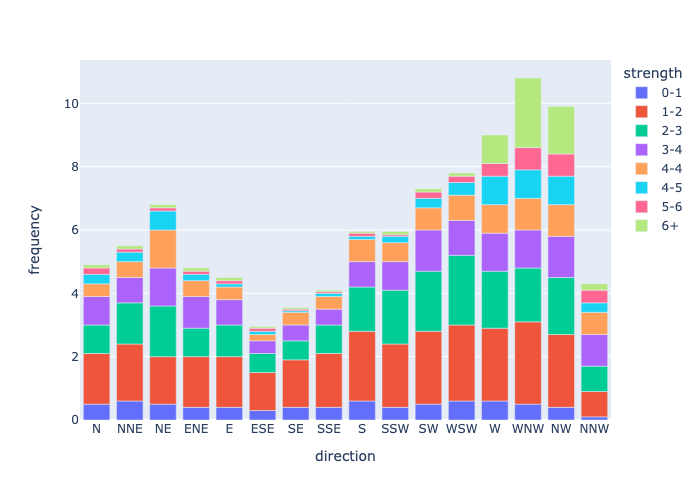

In [10]:
display(bar_plot_image)

We have logged our scatter_plot with Rubicon, so we can remove the file created earlier.

In [11]:
!rm saved-scatter-plot-for-logging.png